(-0.5, 1919.5, 1079.5, -0.5)

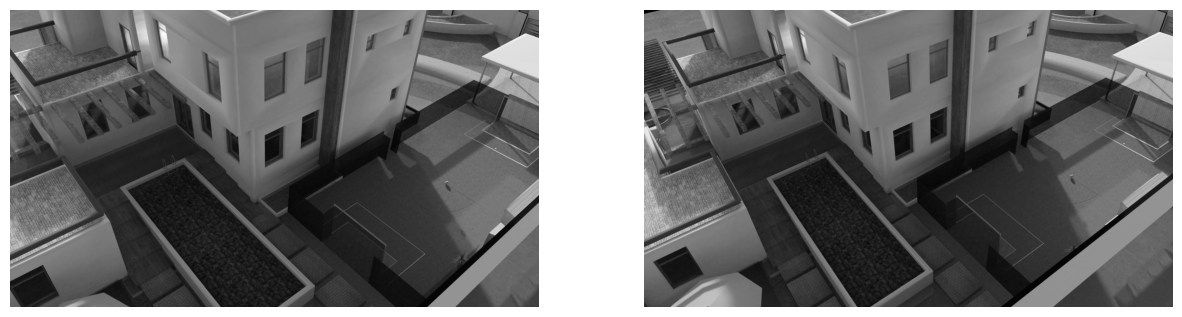

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter

im1 = cv2.imread('./Frame1.png', 0)
im2 = cv2.imread('./Frame2.png', 0)
f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(im1, cmap='gray')
axs[0].axis('off')

axs[1].imshow(im2, cmap='gray')
axs[1].axis('off')

(-0.5, 1919.5, 1079.5, -0.5)

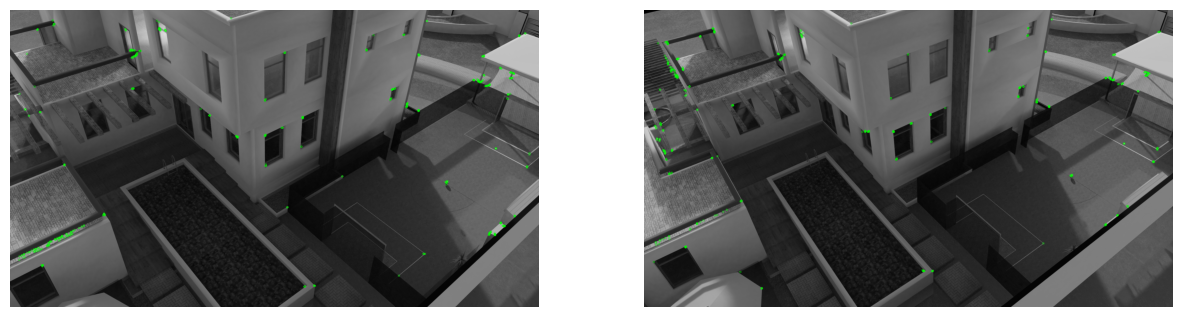

In [2]:
# Initiate ORB detector
orb = cv2.ORB_create()

# detect the key points and corresponding feature descriptor
kp_1, des_1 = orb.detectAndCompute(im1, None)
kp_2, des_2 = orb.detectAndCompute(im2, None)

# draw the key points
im1_keypoints = cv2.drawKeypoints(im1, kp_1, None, [0, 255, 0], flags=0)
im2_keypoints = cv2.drawKeypoints(im2, kp_2, None, [0, 255, 0], flags=0)


f, axs = plt.subplots(1,2,figsize=(15,15))
axs[0].imshow(im1_keypoints)
axs[0].axis('off')

axs[1].imshow(im2_keypoints)
axs[1].axis('off')


< cv2.DMatch 0x7f188efdbfd0>


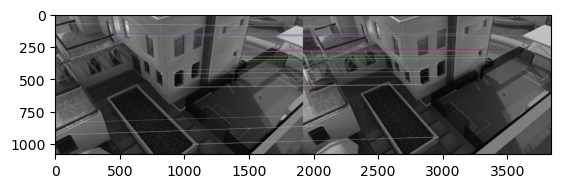

(<matplotlib.image.AxesImage at 0x7f188f03a4a0>, None)

In [3]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des_1, des_2) 

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
print(matches[0])
# Draw all matches.

img3 = cv2.drawMatches(im1, kp_1, im2, kp_2, matches[:50], None)

plt.imshow(img3),plt.show()